# 1. Análisis Exploratorio de Datos (EDA) y Preparación

En este notebook vamos a cargar el dataset directo desde Kaggle, limpiarlo y realizar un análisis exploratorio inicial.

In [ ]:
# Instalamos la librería necesaria para descargar desde Kaggle
%pip install -q kagglehub openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [9]:
# 1. Descargar el dataset usando KaggleHub
path = kagglehub.dataset_download("tunguz/online-retail")

print("Path to dataset files:", path)

# 2. Listar archivos descargados para ver la estructura
files = os.listdir(path)
print("Files in dataset:", files)

# 3. Cargar el archivo correcto (buscamos csv o excel)
import glob

csv_files = glob.glob(os.path.join(path, "*.csv"))
excel_files = glob.glob(os.path.join(path, "*.xlsx"))
xls_files = glob.glob(os.path.join(path, "*.xls")) 

if csv_files:
    print(f"Cargando {csv_files[0]} ...")
    # Intentamos diferentes encodings por si acaso
    try:
        df = pd.read_csv(csv_files[0], encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(csv_files[0], encoding='ISO-8859-1')
elif excel_files:
    print(f"Cargando {excel_files[0]} ...")
    df = pd.read_excel(excel_files[0])
elif xls_files:
    print(f"Cargando {xls_files[0]} ...")
    df = pd.read_excel(xls_files[0])
else:
    raise FileNotFoundError("No se encontraron archivos CSV o Excel en el dataset descargado.")

print("Dataset cargado exitosamente!")
df.head()

100%|██████████| 7.13M/7.13M [00:01<00:00, 6.20MB/s]

Extracting files...


Path to dataset files: C:\Users\lucia\.cache\kagglehub\datasets\tunguz\online-retail\versions\1
Files in dataset: ['Online_Retail.csv']
Cargando C:\Users\lucia\.cache\kagglehub\datasets\tunguz\online-retail\versions\1\Online_Retail.csv ...
Dataset cargado exitosamente!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [10]:
# Información básica del dataset
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


## 2. Limpieza de Datos
Según el plan de implementación:
- Eliminar registros con `CustomerID` nulo.
- Eliminar transacciones canceladas (InvoiceNo con 'C').

In [11]:
# Check for missing values
print("Valores nulos antes de limpieza:")
print(df.isnull().sum())

Valores nulos antes de limpieza:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [12]:
# Eliminar filas sin CustomerID
df_clean = df.dropna(subset=['CustomerID'])

# Eliminar transacciones canceladas
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.contains('C')]

print(f"Filas originales: {len(df)}")
print(f"Filas después de limpieza: {len(df_clean)}")

Filas originales: 541909
Filas después de limpieza: 397924


## 3. EDA - Best Sellers
Identificamos los productos más populares.

C:\Users\lucia\AppData\Local\Temp\ipykernel_19484\4039244921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


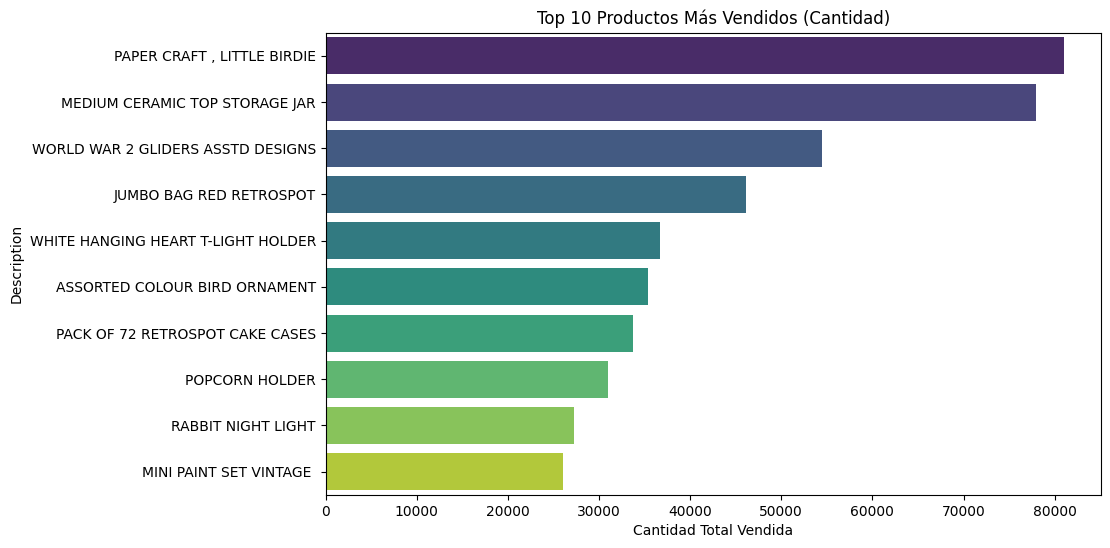

: 

In [ ]:
# Top 10 productos más vendidos por cantidad total
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Productos Más Vendidos (Cantidad)')
plt.xlabel('Cantidad Total Vendida')
plt.show()